In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def process_date_data(df):
  df['Date'] = ''
  for i in range(len(df['Dấu thời gian'])):
    a = datetime.datetime.strptime(df['Dấu thời gian'].to_list()[i],'%d/%m/%Y %H:%M:%S')
    a = a.strftime('%Y-%m-%d')
    df.at[i,'Date'] = a 
  return df 

In [ ]:
def process_city_data(df):
  df['City'] = ''
  for i in range(len(df['City'])):
    a = df['Địa chỉ'][i].split()
    if a[-1] == 'TPHCM' \
      or a[-1] == 'Minh,TPHCM' \
      or a[-1] == 'tphcm' \
      or a[-1] == 'minh' \
      or a[-1] == 'Minh' \
      or a[-1] == 'HCM,TPHCM' \
      or a[-1] == 'hcm' \
      or a[-1] == 'MINH': 
      df.at[i,'City'] = 'TPHCM'
      continue 
    elif len(a) == 2:
      a = a[0] + ' ' + a[1]
      a = a.upper()
      df.at[i,'City'] = a
      continue 
    elif len(a) > 2 :
     a = a[-2:]
     a = a[0] + ' ' + a[1]
     a = a.upper()
     df.at[i,'City'] = a 
    elif len(a) < 2 :
      a = a[0]
      a = a.upper()
      df.at[i,'City'] = a 
  for i in range(len(df['City'])):
    a = df['City'][i].split(',')
    a = a[-1]
    df.at[i,'City'] = a 
  for i in range(len(df['City'])):
    a = df['City'][i].split('.')
    a = a[-1]
    df.at[i,'City'] = a 
  return df 

In [ ]:
def process_phone_data(df):
  df['Số điện thoại'] = df['Số điện thoại'].fillna(0)
  for i in range(len(df['Số điện thoại'])):
    a = str(df['Số điện thoại'][i])
    a = a.split('|')
    a = a[0]
    if a[0] != '0':
      df.at[i,'Số điện thoại'] = '0' + a
    else : 
      df.at[i,'Số điện thoại'] = a 
  return df

In [ ]:
def process_provider_data(df):
  df['ISP_Provider'] = ''
  for i in range(len(df['Số điện thoại'])):
    if df['Số điện thoại'][i] == '0':
      df.at[i,'ISP_Provider'] = 'Other'
    elif df['Số điện thoại'][i][:3] in ['086','096','097','098','032','033','034','035','036','037','038','039']:
      df.at[i,'ISP_Provider'] = 'Viettel'
    elif df['Số điện thoại'][i][:3] in ['070','079','077','076','078','089','090','093']:
      df.at[i,'ISP_Provider'] = 'Mobifone'
    elif df['Số điện thoại'][i][:3] in ['081','082','083','084','085','091','088','091','094']:
      df.at[i,'ISP_Provider'] = 'Vinaphone'
    else :
      df.at[i,'ISP_Provider'] = 'Other'
  return df 

In [ ]:
def main_task():
  df = retrieve_data()
  df = process_date_data(df)
  df = process_city_data(df)
  df = process_phone_data(df)
  df = process_provider_data(df)
  df = df[['Date','Tên','Lý do khách bom hàng','City','ISP_Provider']]
  df = process_reasons_data(df)
  return df

In [ ]:
def process_reasons_data(df):
  df['Reasons'] = ''
  for i in range(len(df['Lý do khách bom hàng'])):
    a = df['Lý do khách bom hàng'].str.split()[i]
    if 'chặn' in a or 'Chặn' in a or 'CHẶN' in a or 'máy' in a:
      df.at[i,'Reasons'] = 'Chặn số'
    elif 'sang' in a or 'Sang' in a or 'SANG' in a or 'vui' in a or 'dui' in a or 'xem' in a or 'coi' in a:
      df.at[i,'Reasons'] = 'Đặt cho vui'
    elif 'dcm' in a or 'đcm' in a or 'đ' in a or 'chó' in a or 'con' in a or 'CHÓ' in a or 'dạy' in a or 'Dạy' in a or 'DẠY' in a or 'hẹn' in a or 'Hẹn' in a or 'nhiều' in a or 'Hãm' in a or 'HÃM' in a:
      df.at[i,'Reasons'] = 'Cố tình nhây , hành shipper'
    elif 'thích' in a or 'Thích' in a or 'ưng' in a:
      df.at[i,'Reasons'] = 'Không thích nên không nhận'
    elif 'nứng' in a or 'dái' in a or 'hãm' in a or 'chuyên' in a or 'nl' in a or 'xấu' in a or 'lol' in a or 'ngu' in a or 'Thánh' in a or 'thánh' in a or 'loz' in a or 'trùm' in a or 'Trùm' in a:
      df.at[i,'Reasons'] = 'Chuyên gia bom hàng'
    elif 'bom' in a or 'BOM' in a or 'Bom' in a :
      df.at[i,'Reasons'] = 'Cố tình bom không lý do'
    elif 'tiền' or 'Tiền' or 'TIỀN' in a :
      df.at[i,'Reasons'] ='Không có tiền'
    else: df.at[i,'Reasons'] = 'Other'
  return df


In [ ]:
df = main_task()

In [ ]:
df.head(10)

,Date,Tên,Lý do khách bom hàng,City,ISP_Provider,Reasons
0,2020-06-28,anh,chặn số shiper,NINH BÌNH,Mobifone,Chặn số
1,2020-06-28,tài,đặt cho sang thôi chứ ko nhận hàng,YÊN BÁI,Viettel,Đặt cho vui
2,2020-06-27,giang,ko nhận hàng,SÓC TRĂNG,Viettel,Không có tiền
3,2020-06-27,giang,ko nhận hàng,SÓC TRĂNG,Viettel,Không có tiền
4,2020-06-25,Chinh,"THẰNG CHÓ NÀY ĐẶT MUA XONG VỀ K ƯNG, TỪ CHỐI M...",BAC NINH,Mobifone,"Cố tình nhây , hành shipper"
5,2020-06-22,nguyễn nam dũng,đặt cho sang mõm,BÌNH PHƯỚC,Vinaphone,Đặt cho vui
6,2020-06-12,Thư Huỳnh,Thích thì không nhận thôi,BẾN TRE,Vinaphone,Không thích nên không nhận
7,2020-06-11,Bui Quoc Dat,đặt mà ko nhận,BÌNH DƯƠNG,Viettel,Không có tiền
8,2020-06-11,nguyễn thị hồng,đặt mà ko nhận,TPHCM,Viettel,Không có tiền
9,2020-06-04,thanh tú,bom hàng,TPHCM,Mobifone,Cố tình bom không lý do


Text(0.5, 1.0, 'Top các lý do bom hàng')

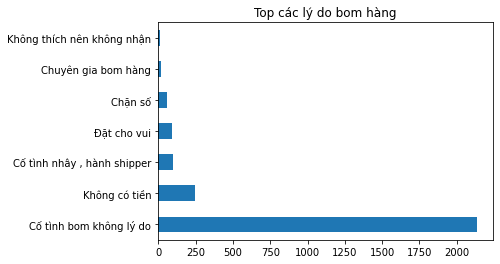

In [ ]:
df['Reasons'].value_counts().plot(kind='barh')
plt.title('Top các lý do bom hàng')

Text(0.5, 1.0, 'Top 10 tỉnh thành có lượt bom hàng nhiều nhất')

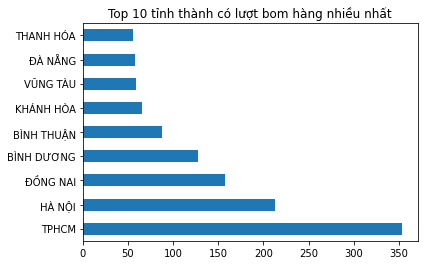

In [ ]:
df['City'].value_counts()[0:9].plot(kind='barh')
plt.title('Top 10 tỉnh thành có lượt bom hàng nhiều nhất')


Text(0.5, 1.0, 'Top nhà mạng có nhiều người bom hàng nhất')

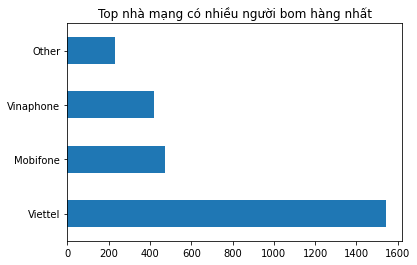

In [ ]:
df['ISP_Provider'].value_counts().plot(kind='barh')
plt.title('Top nhà mạng có nhiều người bom hàng nhất')

Text(0.5, 1.0, 'Top các lý do bom hàng theo tỉnh thành')

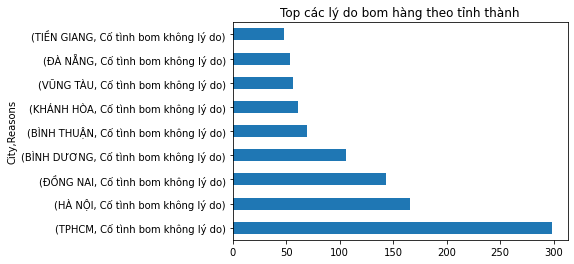

In [ ]:
df[['City','Reasons']].value_counts()[0:9].plot(kind='barh')
plt.title('Top các lý do bom hàng theo tỉnh thành')

In [ ]:
df.to_csv('data_bomhang.csv',header=True)